Paradigm entropy
================

This notebook shows some conditional entropy calculations from Ackerman & Malouf (2013).

In [7]:
%precision 3

import pandas as pd
import numpy as np
pd.set_option('display.float_format',lambda x : '%.3f'%x)

In [8]:
import entropy

Read in the paradigms from tab-delimited file as a pandas DataFrame:

In [9]:
greek = pd.read_table('mgreek.txt',index_col=0)
greek

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
class,,,,,,,,
1,-os,-u,-on,-e,-i,-on,-us,-i
2,-s,-0,-0,-0,-es,-on,-es,-es
3,-0,-s,-0,-0,-es,-on,-es,-es
4,-0,-s,-0,-0,-is,-on,-is,-is
5,-o,-u,-o,-o,-a,-on,-a,-a
6,-0,-u,-0,-0,-a,-on,-a,-a
7,-os,-us,-os,-os,-i,-on,-i,-i
8,-0,-os,-0,-0,-a,-on,-a,-a


The gen.sg and acc.pl are the cells with the largest number of distinct realizations and the gen.pl is the cell with the least:

In [10]:
greek.describe()

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
count,8,8,8,8,8,8,8,8
unique,4,5,4,4,4,1,5,4
top,-0,-u,-0,-0,-a,-on,-a,-a
freq,4,3,5,5,3,8,3,3


If $D$ is the set of declensions for a particular paradigm, the probability (assuming all declensions are equally likely) of an arbitrary lexeme belonging to a particular paradigm $d$ is

$$P(d)=\frac{1}{|D|}$$

Since there are eight distinct classes, the probability of any lexeme belonging to any one class would be $\frac{1}{8}$. We could represent a lexeme's declension as a choice among eight equally likely alternatives, which thus has an entropy of $-\log_2 8=3$ bits. This is the **declension entropy** $H(D)$, the average information required to record the inflection class membership of a lexeme:

In [11]:
np.log2(len(greek.index))

3.000

Let $D_{c=r}$ be the set of declensions for which the paradigm cell $c$ has the formal realization $r$.  Then the probability $P_{c}(r)$ of a paradigm cell $c$ of a particular lexeme having the realization $r$ is the probability of that lexeme belonging to one of the declensions in $D_{c=r}$,  or:

$$P_{c}(r)=\sum_{d\in D_{c=r}}P(d)$$

The entropy of this distribution is the **paradigm cell entropy** $H(c)$, the uncertainty in the realization for a paradigm cell $c$:

In [12]:
pd.DataFrame([entropy.entropy(greek)],index=['H'])

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
H,1.750,2.156,1.549,1.549,1.906,-0.000,2.156,1.906


The average cell entropy is a measure of how difficult it is for a speaker to guess the realization of any one wordform of any particular lexeme in the absence of any information about that lexeme's declension:

In [13]:
entropy.entropy(greek).mean()

1.621

Above we defined $P_{c}(r)$, the probability that paradigm cell $c$ of a lexeme has the realization $r$.  We can easily generalize that to the joint probability of two cells $c_1$ and $c_2$ having the realizations $r_1$ and $r_2$ respectively:

$$P_{c_1,c_2}(r_1,r_2)=\sum_{d\in D_{c_1=r_1 \wedge c_2=r_2}}P(d)$$

To quantify paradigm cell inter-predictability in terms of conditional entropy, we can define the conditional probability of a realization given another realization of a cell in the same lexeme's paradigm:

$$P_{c_1}(r_1|c_2=r_2)=\frac{P_{c_1,c_2}(r_1,r_2)}{P_{c_2}(r_2)}$$

With this background, the conditional entropy $H(c_1|c_2)$ of a cell $c_1$ given knowledge of the realization of $c_2$ for a particular lexeme is:

$$H(c_1|c_2)=\sum_{r_1}\sum_{r_2}P_{c_1}(r_1)\,P_{c_2}(r_2)\log_2 P_{c_1}(r_1|c_2=r_2)$$


In [14]:
H = entropy.cond_entropy(greek)
H

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
nom.sg,NaN,1.000,0.250,0.250,0.750,0.000,1.000,0.750
gen.sg,0.594,NaN,0.594,0.594,0.594,0.000,0.594,0.594
acc.sg,0.451,1.201,NaN,0.000,0.951,0.000,0.951,0.951
voc.sg,0.451,1.201,0.000,NaN,0.951,0.000,0.951,0.951
nom.pl,0.594,0.844,0.594,0.594,NaN,0.000,0.250,0.000
gen.pl,1.750,2.156,1.549,1.549,1.906,NaN,2.156,1.906
acc.pl,0.594,0.594,0.344,0.344,0.000,0.000,NaN,0.000
voc.pl,0.594,0.844,0.594,0.594,0.000,0.000,0.250,NaN


The column averages measure *predictedness*, how hard it is to guess the realization of a cell given some other cell:

In [15]:
pd.DataFrame([H.mean(0)],index=['AVG'])

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
AVG,0.719,1.120,0.561,0.561,0.736,0.000,0.879,0.736


And the row averages measures *predictiveness*, how hard it is to guess the realization of some other cell given this cell:

In [16]:
pd.DataFrame([H.mean(1)],index=['AVG'])

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl
AVG,0.571,0.509,0.644,0.644,0.411,1.853,0.268,0.411


Using pandas, we can add row and column averages to the table:

In [17]:
H = H.join(pd.Series(H.mean(1),name='AVG'))
H = H.append(pd.Series(H.mean(0),name='AVG'))
H

,nom.sg,gen.sg,acc.sg,voc.sg,nom.pl,gen.pl,acc.pl,voc.pl,AVG
nom.sg,NaN,1.000,0.250,0.250,0.750,0.000,1.000,0.750,0.571
gen.sg,0.594,NaN,0.594,0.594,0.594,0.000,0.594,0.594,0.509
acc.sg,0.451,1.201,NaN,0.000,0.951,0.000,0.951,0.951,0.644
voc.sg,0.451,1.201,0.000,NaN,0.951,0.000,0.951,0.951,0.644
nom.pl,0.594,0.844,0.594,0.594,NaN,0.000,0.250,0.000,0.411
gen.pl,1.750,2.156,1.549,1.549,1.906,NaN,2.156,1.906,1.853
acc.pl,0.594,0.594,0.344,0.344,0.000,0.000,NaN,0.000,0.268
voc.pl,0.594,0.844,0.594,0.594,0.000,0.000,0.250,NaN,0.411
AVG,0.719,1.120,0.561,0.561,0.736,0.000,0.879,0.736,0.664


And format the result in $\LaTeX$

In [18]:
print H.to_latex(na_rep='---')

\begin{tabular}{lllllllllr}
\toprule
{} & nom.sg & gen.sg & acc.sg & voc.sg & nom.pl & gen.pl & acc.pl & voc.pl &   AVG \\
\midrule
nom.sg &    --- &  1.000 &  0.250 &  0.250 &  0.750 &  0.000 &  1.000 &  0.750 & 0.571 \\
gen.sg &  0.594 &    --- &  0.594 &  0.594 &  0.594 &  0.000 &  0.594 &  0.594 & 0.509 \\
acc.sg &  0.451 &  1.201 &    --- &  0.000 &  0.951 &  0.000 &  0.951 &  0.951 & 0.644 \\
voc.sg &  0.451 &  1.201 &  0.000 &    --- &  0.951 &  0.000 &  0.951 &  0.951 & 0.644 \\
nom.pl &  0.594 &  0.844 &  0.594 &  0.594 &    --- &  0.000 &  0.250 &  0.000 & 0.411 \\
gen.pl &  1.750 &  2.156 &  1.549 &  1.549 &  1.906 &    --- &  2.156 &  1.906 & 1.853 \\
acc.pl &  0.594 &  0.594 &  0.344 &  0.344 &  0.000 &  0.000 &    --- &  0.000 & 0.268 \\
voc.pl &  0.594 &  0.844 &  0.594 &  0.594 &  0.000 &  0.000 &  0.250 &    --- & 0.411 \\
AVG    &  0.719 &  1.120 &  0.561 &  0.561 &  0.736 &  0.000 &  0.879 &  0.736 & 0.664 \\
\bottomrule
\end{tabular}



Next we try a simple bootstrap simulation to test the importance of implicational relations in the paradigm. 

Statistical hypothesis testing proceeds by identifying a statistic whose sampling distribution is known under the null hypothesis $H_0$, and then estimating the  probability of finding a result which deviates from what would be expected under $H_0$ at least as much as the observed data does. In this case,  $H_0$ is that implicational relations are not a factor in reducing average conditional entropy in Modern Greek, and the relevant statistic is the average conditional entropy.  Unfortunately, we have no theoretical basis for deriving the sampling distribution of average conditional entropy under $H_0$, which precludes the use of conventional statistical methods. However, we can use a simple computational procedure for estimating the sampling distribution of the average conditional entropy.  Take MGreek$'$, an alternate version of Modern Greek with formal realizations assigned randomly to paradigm cells. More specifically, we generate  MGreek$'$ by constructing 8 random declensions, where each declension is produced by randomly selecting for each of the 8 paradigm cells one of the possible realizations of that cell.  The result is a language with more or less the same same number of declensions, paradigm cells, and allomorphs as genuine Modern Greek, but with no implicational structure.

In [19]:
boot = entropy.bootstrap(greek, 999)

Averaged across 999 simulation runs (plus the original), the average average conditional entropy is 0.850 bits, somewhat higher than the true average conditional entropy of 0.664 bits:

In [23]:
boot.mean()

0.850

In [24]:
boot[0]

0.664

Across the distribution of simulated MGreek$'$s, the real MGreek is an outlier: only 0.1% of the sample have an average conditional entropy as lower or lower than that of real Modern Greek:

In [26]:
sum(boot <= boot[0]) / 1000.

0.001

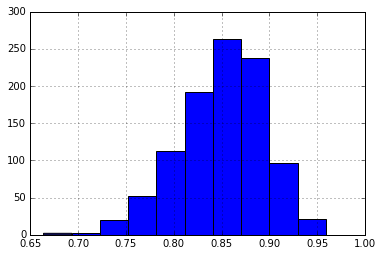

In [28]:
%matplotlib inline

plot = boot.hist()